# Capstone Project: Topic Modelling of Academic Journals (Model-Based Systems Engineering)

# 05: Topic Modeling Evaluation

In this notebook, we will perform the following actions:
1. Evaluation of the topic modeling output

## Import Libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from wordcloud import WordCloud

# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Import Data

In [2]:
# Import the data for modelling
journals = pd.read_csv('../data/journals_topics.csv')

In [3]:
# Take a quick look at the data
journals.head()

,title,abstract,year,tokens,topic,0,1,2,3,4,5,6,7
0,Model-based Design Process for the Early Phase...,This paper presents an approach for a model-ba...,2017,paper present approach planning process early ...,3,0.134677,0.049330,0.121864,0.157459,0.018720,0.165620,0.034708,0.056888
1,Model Based Systems Engineering using VHDL-AMS,The purpose of this paper is to contribute to ...,2013,purpose paper contribute definition ( ) approa...,6,0.166052,0.053813,0.101767,0.040338,0.025920,0.180074,0.204835,0.046355
2,Code Generation Approach Supporting Complex Sy...,Code generation is an effective way to drive t...,2022,code generation effective way drive complex de...,5,0.048002,0.023436,0.040045,0.012378,0.006812,0.110110,0.013624,0.015338
3,Model based systems engineering as enabler for...,"Product complexity is steadily increasing, cus...",2021,"product complexity steadily increasing , custo...",3,0.144370,0.045020,0.161951,0.335414,0.020165,0.169411,0.040359,0.061398
4,Electric Drive Vehicle Development and Evaluat...,To reduce development time and introduce techn...,2014,reduce development time introduce technology f...,0,0.487260,0.042662,0.097253,0.059448,0.029092,0.165888,0.037608,0.069110


## Labels Identified from the Topic Model

Here, we will take a look at the key words extracted for each topic, as well as the top few articles of each topic to properly identify and assess intent behind each topic. We will then apply this information as well as our domain knowledge to generate a proper label for each topic.

|Topic| Top 10 Key Words for Topic| Topic Label Using Domain Knowledge|
|-----|---------------------------|-----------------------------------|
|0| cubesat, vehicle, spacecraft, satelite, requirement, nasa, modeling, submarine, payload, electric vehicle| Application of MBSE in Projects|
|1| sysml, modeling, simulation, modeling language, uml, language sysml, diagram, modeling language sysml, software, specification| Modeling language for MBSE|
|2| ontology, research, reuse, paper, industry, knowledge, semantic, tool, modeling, database| Adoption of MBSE and its Evaluation Metrics|
|3| development, product development, production, process, manufacturing, industrial, iot, product line, toolchain, development process| Product Development Process Using MBSE|
|4| reliability, safety analysis, fmea, fault tree, design safety, safety artifact, medical device, reliability analysis, failure mode, safety critical| Safety Assurance Using MBSE|
|5| mechatronic, inspection, inspection equipment, production scheduling, modeling, constraint, business rule, validation, property verification, mechatronic product| Validation & Verification Using MBSE|
|6| requirement, design, engineer, specification, hcd, wfrequirements, text-based requirement, cm process, property-based requirement, methodology| MBSE for Requirements Specification|
|7| digital twin, cyber, resilience, mbsecps, simplexity test-bed, security threat, vulnerability, twin technology, risk assessment, cpg| MBSE for Digital Twin and Cybersecurity|


In [15]:
# Take a look at the top 5 articles for Topic 0
journals[['title', 'abstract', '0']].sort_values(by = '0', ascending=False).head()

,title,abstract,0
719,Forward Design of Landing Gear Retraction Syst...,"In this paper, according to the forward design...",1.0
422,The Economic Benefits of Human Performance Mod...,Abstract Human performance modeling (HPM) is a...,1.0
582,MBSE approach to support and formalize mission...,This paper deals with the application of a Mod...,1.0
52,Model-Based Systems Engineering approach for t...,The Origins Spectral Interpretation Resource I...,1.0
820,The Digital (Mission) Twin: an Integrating Con...,Top-down decomposition of a complex system of ...,1.0


In [17]:
# Take a look at the top 5 articles for Topic 1
journals[['title', 'abstract', '1']].sort_values(by = '1', ascending=False).head()

,title,abstract,1
788,Simulating SysML transportation models,Model-based Systems Engineering (MBSE) promise...,1.0
186,Simulation of Database Interactions for Early ...,Digitized enterprise processes often encompass...,1.0
375,Frenemies: OPM and SysML Together in an MBSE M...,Abstract A Frenemy is “a person with whom one ...,1.0
554,Creating SysML views from an OPM model,Conceptual modeling is key to model-based syst...,1.0
561,Verification of embedded system's specificatio...,The authors propose an extension of SysML whic...,1.0


In [18]:
# Take a look at the top 5 articles for Topic 2
journals[['title', 'abstract', '2']].sort_values(by = '2', ascending=False).head()

,title,abstract,2
133,The Ontology of Systems Engineering: Towards a...,The goal of implementing an enterprise digital...,1.0
301,Towards Developing Metrics to Evaluate Digital...,Abstract Model-based systems engineering (MBSE...,1.0
32,Maturity assessment of Systems Engineering reu...,To enable the transition towards Model-Based S...,1.0
591,Can ontologies prevent MBSE models from becomi...,Model-based systems engineering provides a sof...,1.0
233,Evolving Model-Based Systems Engineering Ontol...,Abstract Model-Based Systems Engineering (MBSE...,1.0


In [19]:
# Take a look at the top 5 articles for Topic 3
journals[['title', 'abstract', '3']].sort_values(by = '3', ascending=False).head()

,title,abstract,3
182,Automated Derivation of Optimal Production Seq...,"Customer specific, individual products nowaday...",1.0
678,Achieving flexibility in business process mode...,Companies nowadays are under increasing pressu...,1.0
610,Product-Process MBSE and Dysfunctional Analysi...,The integration of new technologies and the in...,1.0
618,Model-based Systems Engineering Process for Su...,Combining the benefits of model-based systems ...,1.0
13,Model Based Systems Engineering in Modular Des...,Many industries have to react progressively to...,1.0


In [20]:
# Take a look at the top 5 articles for Topic 4
journals[['title', 'abstract', '4']].sort_values(by = '4', ascending=False).head()

,title,abstract,4
593,An Integrated System Design and Safety Framewo...,Safety analysis is often performed independent...,1.0
130,AADL-Based safety analysis using formal method...,Model-based engineering tools are increasingly...,1.0
572,Obtaining Fault Trees Through SysML Diagrams: ...,Reliability analysis provides fundamental resu...,1.0
634,Dynamic Fault Tree Generation for Safety-Criti...,Systems are getting increasingly complex and c...,1.0
757,KAUSAL: A New Methodological Approach for Mode...,The increasing complexity of modern products i...,1.0


In [21]:
# Take a look at the top 5 articles for Topic 5
journals[['title', 'abstract', '5']].sort_values(by = '5', ascending=False).head()

,title,abstract,5
667,A Practitioner’s Guide to Optimizing the Inter...,As model-based approaches to Systems Engineeri...,1.0
587,Requirement analysis of inspection equipment f...,Quality control is an essential part in the pr...,1.0
191,Modelling and Simulation for the Integrated De...,The development of mechatronic systems involve...,1.0
676,Practicing modelling in manufacturing,This paper is about understanding modelling pr...,1.0
677,Efficient recognition of finite satisfiability...,Models lie at the heart of the emerging Model-...,1.0


In [22]:
# Take a look at the top 5 articles for Topic 6
journals[['title', 'abstract', '6']].sort_values(by = '6', ascending=False).head()

,title,abstract,6
849,Deploying model-based systems engineering with...,Prerequisites - to be provided by Customer. Pr...,1.0
450,Toward a property based requirements theory: S...,"Abstract In this paper, we outline a property-...",1.0
215,7.2.3 On enabling a model-based systems engine...,Abstract This paper considers the requirements...,1.0
721,Structural Rules for an Intelligent Advisor to...,Requirements define the problem boundaries wit...,1.0
93,A decision-making framework for selecting an M...,The increasing system complexity due to techno...,1.0


In [23]:
# Take a look at the top 5 articles for Topic 7
journals[['title', 'abstract', '7']].sort_values(by = '7', ascending=False).head()

,title,abstract,7
167,Subsystem selection for digital twin developme...,Digital twins are virtual representations of s...,1.0
668,Augmenting MBSE with Digital Twin Technology: ...,Model-Based Systems Engineering (MBSE) require...,1.0
796,Integrating Machine Learning in Digital Twins ...,Fueled by the opportunities for supporting man...,1.0
487,Enabling design of agile security in the IOT w...,Design for system security within the IOT is a...,1.0
446,Microreactor Testbed Automation through Digita...,Abstract Digital engineering is the practice o...,1.0


## Distribution of Articles Across Labels

Below we have plotted the distribution of articles across the topics. We can see that majority of the articles are in Topics 0 to 3. However, there is a reasonable number of topics in topics 4 to 7 to ensure that there is sufficient reading material for the topic and to do classification modeling later on.

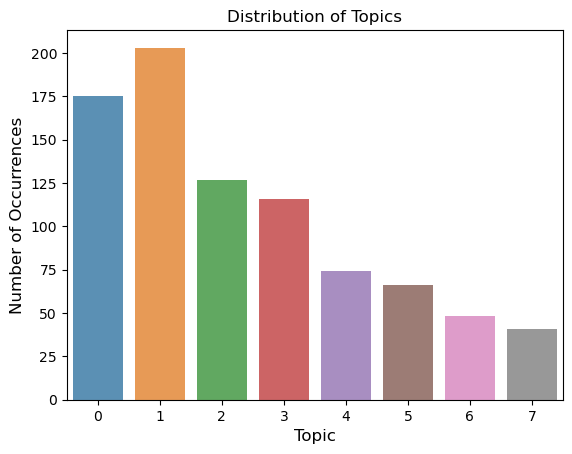

In [34]:
# Get the distribution of the topics
topic_dist = journals['topic'].value_counts()

# Plot the distribution of the topics
sns.barplot(x=topic_dist.index, y=topic_dist.values, alpha=0.8)
plt.title('Distribution of Topics')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.show()

## Trends of Topics Over the Past 10 Years

Below is the distribution of topics by percentage over the past 10 years. We have identified two key insights:
1. Despite Topic 4 (System Assurance using MBSE) have only 4 months of data in 2023, there has been a lot of interest in the field lately
2. Prior to 2016, Topic 7 (MBSE for Digital Twin and Cybersecurity) had zero articles. In 2016, a lot of interest in the topic was picked up.

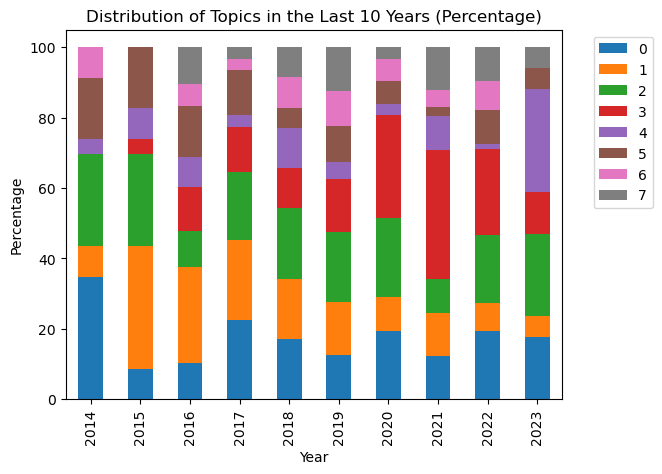

In [52]:
# Convert counts to percentages
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the distribution over the years as percentages
ax = grouped_percent.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Distribution of Topics in the Last 10 Years (Percentage)')

# Place the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

## Topic Insights

By looking at the keywords and top few article abstracts for each other, we have also summarized each topic with its capabilities as well as identified stakeholder in the organization.

|Topic| Topic Label| Topic Summary| Identified Stakeholder|
|-----|------------|--------------|-----------------------|
|0|Application of MBSE in Projects| Real-life examples of MBSE application <br><br> Aerospace, NASA, Electric Vehicles, Navel| EV-Electric Charging Pte Ltd subsidiary recently set up|
|1|Modeling Language for MBSE| One of three pillars of MBSE <br><br> Systems Modeling Langauge (SysML)| All users, to learn language and modeling best practices|
|2|Adoption of MBSE and Evaluation Metrics| Guide adoption process <br><br> Evaluation metrics for ROI| Core MBSE Team performing R&D to adopt MBSE in the Org|
|3|Product Development Process using MBSE| Product Development <br><br> Manufacturing| Fare Systems Team performing in-house product development|
|4|Safety Assurance using MBSE| Safety Analysis <br><br> Reliability <br><br> Failure Mode| Safety Assurance Team performing and reviewing safety and reliability analysis for new projects|
|5|Validation & Verification using MBSE| V&V of product <br><br> Inspection of equipment| Project Teams in charge of ensuring project delivery|
|6| MBSE for Requirements Specification| Design Requirements Specification <br><br> Change Management| Engineering Teams in charge of specifying requirements for new projects|
|7| MBSE for Digital Twin and Cybersecurity| Digital Twin <br><br> Cyber Resilience <br><br> Vulnerability Assessment <br><br> Security| Cybersecurity & Project Teams delivering critical information infrastructure|

## Recommendations

Based on the insights and trends observed, we would make the following recommendations for the short-term and long-term.

**Short-Term**

As the core MBSE team only has the capacity to engage one stakeholder at a time, we would recommend to engage the Systems Assurance Team based on the following points:
1. Current trends show that Systems Assurance is picking in the MBSE space
2. Our teams share the same Director, which makes it easier to collaborate and overcome inertia to implement new things
3. The nature of systems assurance has significant impact, given the importance of our MRT lines. This makes the ROI even more attractive

**Long-Term**

We have now identified the capabilites of MBSE as well as the relevant stakeholders that could be engaged and could benefit from the implementation of MBSE. We can use this information to engage our management to properly plan at the organizational level for the adoption of MBSE.

## Future Works

As part of our future works, we would like to further break down Topic 0 (Application of MBSE in Projects) into specific domains such as aerospace, naval, electric vehicles, NASA, etc. This would be beneficial to domain specific stakeholders as they can view articles specific to their field.

## Next Step

In the next notebook, we will train a classification model to help label newly published articles 